In [11]:
#program-1
from collections import deque
class Graph:
    def __init__(self,adjac_lst):
        self.adjac_lst = adjac_lst
    
    def get_neighbors(self,v):
        return self.adjac_lst[v]
    
    def h(self,n):
        H={
            'A':1,
            'B':1,
            'C':1,
            'D':1
        }
        return H[n];
    
    def a_star(self,start,stop):
        open_lst = set([start])
        closed_lst= set([])
        
        poo = {}
        poo[start]=0
        
        par={}
        par[start] = start
        
        while len(open_lst)>0:
            n = None
            
            for v in open_lst:
                if n == None or poo[v] + self.h(v) < poo[n] + self.h(n):
                    n = v
            if n==None:
                print('Path doesnot exist')
                return None
            
            if n==stop:
                reconst_path = []
                while par[n]!=n:
                    reconst_path.append(n)
                    n = par[n]
                reconst_path.append(start)
                reconst_path.reverse()
                print('path found {}'.format(reconst_path))
                return reconst_path
            
            for (m,weight) in self.get_neighbors(n):
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight
                    
                else:
                    if poo[m]> poo[n] + weight:
                        poo[m] = poo[n]+ weight
                        par[m] = n
                        
                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)
            open_lst.remove(n)
            closed_lst.add(n)
        print('path doesnot exist')
        return None

adjac_lst = {
    'A': [('B',1),('C',3),('D',7)],
    'B':[('D',5)],
    'C':[('D',12)]
}
graph1 = Graph(adjac_lst)
graph1.a_star('A','D')

path found ['A', 'B', 'D']


['A', 'B', 'D']

In [1]:
#program -2
class Graph:
    def __init__(self, graph, heuristicNodeList, startNode):
        self.graph = graph
        self.H=heuristicNodeList
        self.start=startNode
        self.parent={}
        self.status={}
        self.solutionGraph={}
        
    def applyAOStar(self): 
        self.aoStar(self.start, False)
        
    def getNeighbors(self, v): 
        return self.graph.get(v,'')
    
    def getStatus(self,v): 
        return self.status.get(v,0)
    
    def setStatus(self,v, val):
        self.status[v]=val
        
    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0) 
    
    def setHeuristicNodeValue(self, n, value):
        self.H[n]=value
        
    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE START NODE:",self.start)
        print("-------------------------------------------------------")
        print(self.solutionGraph)
        print("-------------------------------------------------------")
    
    def computeMinimumCostChildNodes(self, v):
        minimumCost=0
        costToChildNodeListDict={}
        costToChildNodeListDict[minimumCost]=[]
        flag=True
        for nodeInfoTupleList in self.getNeighbors(v):
            cost=0
            nodeList=[]
            
            for c, weight in nodeInfoTupleList:
                cost=cost+self.getHeuristicNodeValue(c)+weight
                nodeList.append(c)
                
            if flag==True:
                minimumCost=cost
                costToChildNodeListDict[minimumCost]=nodeList
                flag=False
            else:
                if minimumCost>cost:
                    minimumCost=cost
                    costToChildNodeListDict[minimumCost]=nodeList
        return minimumCost, costToChildNodeListDict[minimumCost]
    
    def aoStar(self, v, backTracking):
        print("HEURISTIC VALUES :", self.H)
        print("SOLUTION GRAPH :", self.solutionGraph)
        print("PROCESSING NODE :", v)
        print("-------------------------------------------------------")
        
        if self.getStatus(v) >= 0:
            minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
            self.setHeuristicNodeValue(v, minimumCost)
            self.setStatus(v,len(childNodeList))
            solved=True 
            
            for childNode in childNodeList:
                self.parent[childNode]=v
                if self.getStatus(childNode)!=-1:
                    solved=solved & False
                    
            if solved==True: 
                self.setStatus(v,-1)
                self.solutionGraph[v]=childNodeList 
                
            if v!=self.start:
                self.aoStar(self.parent[v], True)
                
            if backTracking==False: 
                for childNode in childNodeList:
                    self.setStatus(childNode,0)
                    self.aoStar(childNode, False)
h1 = {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J':1, 'T': 3}
graph1 = {
'A': [[('B', 1), ('C', 1)], [('D', 1)]],
'B': [[('G', 1)], [('H', 1)]],
'C': [[('J', 1)]],
'D': [[('E', 1), ('F', 1)]],
'G': [[('I', 1)]]
}
G1 = Graph(graph1, h1, 'A')
G1.applyAOStar()
G1.printSolution()

h2 = {'A': 1, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}
graph2 = {
'A': [[('B', 1), ('C', 1)], [('D', 1)]],
'B': [[('G', 1)], [('H', 1)]],
'D': [[('E', 1), ('F', 1)]]
}

G2 = Graph(graph2, h2, 'A')
G2.applyAOStar()
G2.printSolution()

HEURISTIC VALUES : {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : A
-------------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : B
-------------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : A
-------------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : G
-------------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 8, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : B
---------------------------

In [3]:
#program -3
import numpy as np
import pandas as pd

data = pd.read_csv('enjoysport.csv')
concepts = np.array(data.iloc[:,0:-1])
print(concepts)

target = np.array(data.iloc[:,-1])
print(target)

def learn(concepts, target):
    print("\ninitialization of specific_h and general_h\n")
    specific_h = concepts[0].copy()
    print(specific_h)
    
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)
    
    for i, h in enumerate(concepts):
        print("\nFor Loop Starts")
        if target[i] == "yes":
            print("If instance is Positive ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'
        if target[i] == "no":
            print("If instance is Negative ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
        print(" steps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)
        print("\n")
    indices = [i for i, val in enumerate(general_h) if val == ['?','?','?','?','?','?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?','?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final Specific_h:", s_final)
print("\n")
print("Final General_h:", g_final)
print("\n")

[['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]
['yes' 'yes' 'no' 'yes']

initialization of specific_h and general_h

['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

For Loop Starts
If instance is Positive 
 steps of Candidate Elimination Algorithm 1
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]



For Loop Starts
If instance is Positive 
 steps of Candidate Elimination Algorithm 2
['sunny' 'warm' '?' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?

In [10]:
#program 4
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from pprint import pprint
from collections import Counter

def id3(df,target,attribute_names,default_class = None):
    cnt = Counter(x for x in df[target])
    if(len(cnt)==1):
        return next(iter(cnt))
    
    elif df.empty or (not attribute_names):
        return default_class
    
    else:
        gainz = mutual_info_classif(df[attribute_names],df[target],discrete_features = True)
        index_of_max = gainz.tolist().index(max(gainz))
        best = attribute_names[index_of_max]
        tree = {best:{}}
        remaining = [i for i in attribute_names if i!=best]
        
        for attr_val , datasubset in df.groupby(best):
            subtree = id3(datasubset,target,remaining,default_class)
            tree[best][attr_val] = subtree
            
        return tree

df= pd.read_csv('id3.csv')
attribute_names = df.columns.tolist()
print('List of attrubute names are: ')
print(attribute_names)

attribute_names.remove('PlayTennis')
for column in df.select_dtypes('object'):
    df[column], _ = df[column].factorize()

print(df)

print('The tree structure: ')
tree = id3(df,"PlayTennis",attribute_names)
pprint(tree)

List of attrubute names are: 
['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']
    Outlook  Temperature  Humidity  Wind  PlayTennis
0         0            0         0     0           0
1         0            0         0     1           0
2         1            0         0     0           1
3         2            1         0     0           1
4         2            2         1     0           1
5         2            2         1     1           0
6         1            2         1     1           1
7         0            1         0     0           0
8         0            2         1     0           1
9         2            1         1     0           1
10        0            1         1     1           1
11        1            1         0     1           1
12        1            0         1     0           1
13        2            1         0     1           0
The tree structure: 
{'Outlook': {0: {'Humidity': {0: 0, 1: 1}}, 1: 1, 2: {'Wind': {0: 1, 1: 0}}}}


In [14]:
#program 5
import numpy as np

X = np.array(([2,9],[1,5],[3,6]),dtype=float)
y = np.array(([92],[86],[89]),dtype=float)

X = X/np.amax(X,axis=0)
y = y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad(x):
    return x*(1-x)

iteration = 5000
lr = 0.1
IN = 2
HN = 3
ON = 1

hw = np.random.uniform(size=(IN,HN))
ow = np.random.uniform(size=(HN,ON))
hb = np.random.uniform(size=(1,HN))
ob = np.random.uniform(size=(1,ON))

for i in range(iteration):
    h_inp = np.dot(X,hw)
    hl = sigmoid(h_inp + hb)
    
    o_inp = np.dot(hl,ow)
    ol = sigmoid(o_inp +ob)
    
    error = y-ol
    outgrad = grad(ol)
    d_o = error*outgrad
    
    EH = d_o.dot(ow.T)
    hg = grad(hl)
    d_hl = EH*hg
    
    ow += hl.T.dot(d_o)*lr
    hw += X.T.dot(d_hl)*lr

print('Input: ', str(X))
print('Actual: ', str(y))
print('predicted: ', str(ol))

Input:  [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual:  [[0.92]
 [0.86]
 [0.89]]
predicted:  [[0.89379155]
 [0.88251742]
 [0.89337523]]


In [26]:
#program 6
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

msg = pd.read_csv('naivetext.csv',names=['message','label'])
print('dimension',msg.shape)
msg['labelnum'] = msg.label.map({'pos':1,'neg':0})
X=msg.message
Y = msg.labelnum
print(X)
print(Y)

xtrain,xtest,ytrain,ytest = train_test_split(X,Y)
print('training data',ytrain.shape)
print('test data',ytest.shape)

count = CountVectorizer()
xtrain_dtm = count.fit_transform(xtrain)
xtest_dtm = count.transform(xtest)
print("words and tokens")
print(count.get_feature_names_out())

df= pd.DataFrame(xtrain_dtm.toarray(),columns = count.get_feature_names_out())

clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)

print('accuracy: ',metrics.accuracy_score(ytest,predicted))
print('Confusion matrix: ',metrics.confusion_matrix(ytest,predicted))
print('precision: ',metrics.precision_score(ytest,predicted))
print('recall: ',metrics.recall_score(ytest,predicted))

dimension (18, 2)
0                      I love this sandwich
1                  This is an amazing place
2        I feel very good about these beers
3                      This is my best work
4                      What an awesome view
5             I do not like this restaurant
6                  I am tired of this stuff
7                    I can't deal with this
8                      He is my sworn enemy
9                       My boss is horrible
10                 This is an awesome place
11    I do not like the taste of this juice
12                          I love to dance
13        I am sick and tired of this place
14                     What a great holiday
15           That is a bad locality to stay
16           We will have good fun tomorrow
17         I went to my enemy's house today
Name: message, dtype: object
0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17    0
Name: labelnum, d

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The accuracy score of K-Mean:  0.24
The Confusion matrix of K-Mean:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
The accuracy score of EM:  0.36666666666666664
The Confusion matrix of EM:
  [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


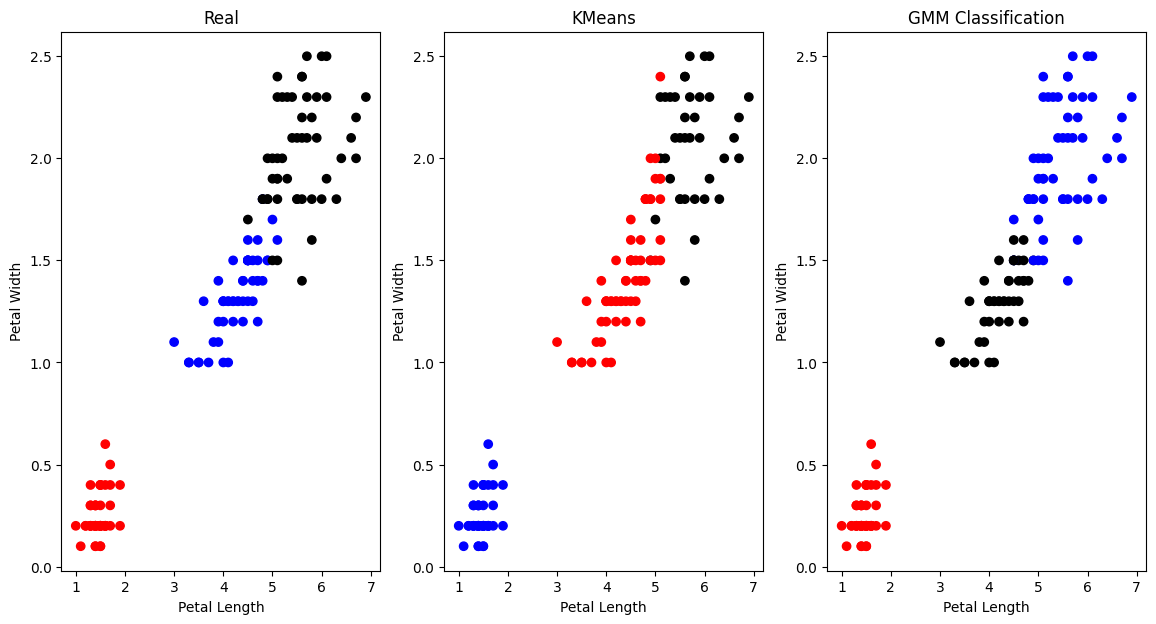

In [4]:
#program-7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import datasets

dataset = datasets.load_iris()
X = pd.DataFrame(dataset.data)  
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(dataset.target)
y.columns = ['Targets']

plt.figure(figsize=(14,7))
colormap=np.array(['red','blue','black'])

plt.subplot(1,3,1)
plt.title('Real')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets])

model=KMeans(n_clusters=3, random_state=0).fit(X)
plt.subplot(1,3,2)
plt.title('KMeans')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_])

print('The accuracy score of K-Mean: ',metrics.accuracy_score(y, model.labels_))
print('The Confusion matrix of K-Mean:\n',metrics.confusion_matrix(y, model.labels_))

gmm=GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm])

print('The accuracy score of EM: ',metrics.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM:\n ',metrics.confusion_matrix(y, y_cluster_gmm))

In [5]:
#program-8
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

iris_dataset=load_iris()

print("\n IRIS FEATURES \ TARGET NAMES:", iris_dataset.target_names)

for i in range(len(iris_dataset.target_names)):
    print("\nlabel [{0}]:[{1}]".format(i,iris_dataset.target_names[i]))
    
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"],iris_dataset["target"], random_state=0)

# print("\n Target :\n",iris_dataset["target"])

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)
x_new = np.array([[5, 2.9, 1, 0.2]])

print("\n XNEW \n",x_new)
prediction = kn.predict(x_new)
print("\n Predicted target value: {}".format(prediction))
print("\n Predicted feature name:{}\n".format(iris_dataset["target_names"][prediction]))
# i=1
# x= X_test[i]
# x_new = np.array([x])
for i in range(len(X_test)):
    x = X_test[i]
    x_new = np.array([x])
    prediction = kn.predict(x_new)
    print("\n Actual : {0} {1}, Predicted :{2}{3}".format([y_test[i]],iris_dataset["target_names"][y_test[i]],prediction,iris_dataset["target_names"][ prediction]))
print("\n TEST SCORE[ACCURACY]: {:.2f}\n".format(kn.score(X_test, y_test)))



 IRIS FEATURES \ TARGET NAMES: ['setosa' 'versicolor' 'virginica']

label [0]:[setosa]

label [1]:[versicolor]

label [2]:[virginica]

 XNEW 
 [[5.  2.9 1.  0.2]]

 Predicted target value: [0]

 Predicted feature name:['setosa']


 Actual : [2] virginica, Predicted :[2]['virginica']

 Actual : [1] versicolor, Predicted :[1]['versicolor']

 Actual : [0] setosa, Predicted :[0]['setosa']

 Actual : [2] virginica, Predicted :[2]['virginica']

 Actual : [0] setosa, Predicted :[0]['setosa']

 Actual : [2] virginica, Predicted :[2]['virginica']

 Actual : [0] setosa, Predicted :[0]['setosa']

 Actual : [1] versicolor, Predicted :[1]['versicolor']

 Actual : [1] versicolor, Predicted :[1]['versicolor']

 Actual : [1] versicolor, Predicted :[1]['versicolor']

 Actual : [2] virginica, Predicted :[2]['virginica']

 Actual : [1] versicolor, Predicted :[1]['versicolor']

 Actual : [1] versicolor, Predicted :[1]['versicolor']

 Actual : [1] versicolor, Predicted :[1]['versicolor']

 Actual : [1] ve

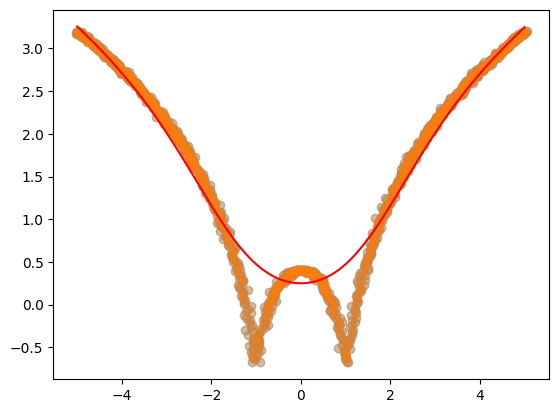

In [36]:
#program 9
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)
y = np.log(np.abs((x ** 2) - 1) + 0.5)
x = x + np.random.normal(scale=0.05, size=1000) 
plt.scatter(x, y, alpha=0.3)

def local_regression(x0, x, y, tau): 
    x0 = np.r_[1, x0]
    x = np.c_[np.ones(len(x)), x]
    xw = x.T * radial_kernel(x0, x, tau) 
    beta = np.linalg.pinv(xw @ x) @ xw @ y 
    return x0 @ beta

def radial_kernel(x0, x, tau):
    return np.exp(np.sum((x - x0) ** 2, axis=1) / (-2 * tau ** 2))

def plot_lr(tau):
    domain = np.linspace(-5, 5, num=500)
    pred = [local_regression(x0, x, y, tau) for x0 in domain] 
    plt.scatter(x, y, alpha=0.3)
    plt.plot(domain, pred, color="red") 
    return plt

plot_lr(1).show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1000 is different from 2)

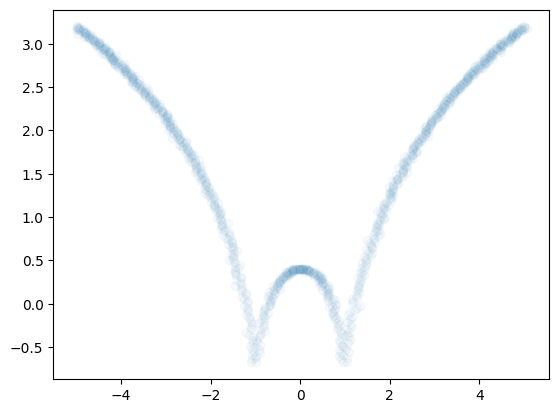

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,1000)
y = np.log(np.abs((x**2)-1) + 0.5)
x = x + np.random.normal(scale=0.05,size=1000)
plt.scatter(x,y,alpha=0.03)

def local_regression(x0, x, y, tau):
    x0 = np.r_[1,x0]
    x = np.c_[np.ones(len(x)),x]
    xw = x.T * radial_kernel(x0,x,tau)
    beta = np.linalg.pinv(x0 @ x) @ x0 @ y
    return x0 @ beta
    
def radial_kernel(x0,x,tau):
    return np.exp(np.sum((x-x0)**2,axis=1)/(-2 * tau**2))

def plot_lr(tau):
    domain = np.linspace(-5, 5, num=500)
    pred = [local_regression(x0, x, y, tau) for x0 in domain] 
    plt.scatter(x, y, alpha=0.3)
    plt.plot(domain, pred, color="red") 
    return plt
plot_lr(1).show()
